<a href="https://colab.research.google.com/github/Dharshinis2810/Predictive-Analysis-Mileage-/blob/main/Predictive_Analysis_(Mileage).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive Analysis with Python
**Supervised Machine Learning : Mileage Prediction** 

**Source** : The dataset was used in the 1983 American Statistical Association Exposition.

**Attribute Information** : 
1.mpg: continusous (y)

2.cylinders: multi-valued discrete

3.displacement: continuous(X)

4.horsepower: continuous(X)

5.weight: continuous(X)

6.acceleration: continuous(X)

7.model year: multi-valued discrete

8.origin: multi-valued discrete

9.car name: string(unique for each instance)


In [1]:
import pandas as pd

In [75]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

##Import Data

In [5]:
df=pd.read_csv("/content/MPG.csv")

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


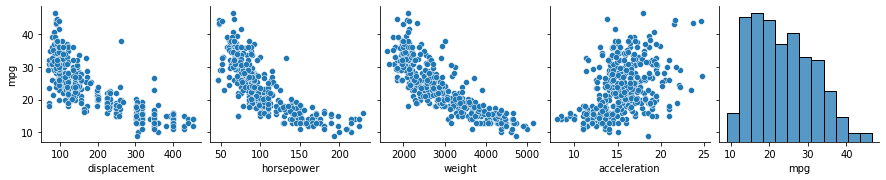

In [13]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

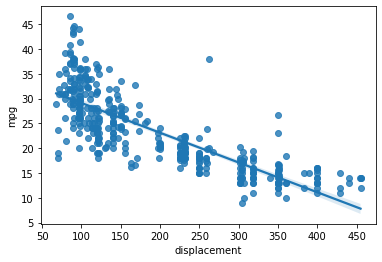

In [14]:
sns.regplot(x='displacement',y='mpg',data=df)

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y=df['mpg']

In [17]:
y.shape

(392,)

In [18]:
x=df[['displacement','horsepower','weight','acceleration']]

In [20]:
x.shape

(392, 4)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()

In [24]:
X=ss.fit_transform(x)

In [26]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [27]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

##Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [51]:
lr=LinearRegression()

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
lr.intercept_

23.485738559737584

In [54]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

### **Mileage=23.4 - 1.029 Displacement - 1.529 Horse Power - 4.219 Weight + error**

In [55]:
y_pred=lr.predict(X_test)

In [56]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

## Model Accuracy

In [60]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score


In [57]:
mean_absolute_error(y_test,y_pred)

3.3286968643244106

In [58]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [61]:
r2_score(y_test,y_pred)

0.7031250746717692

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [64]:
X_train2=poly.fit_transform(X_train
                          )

In [74]:
X_test2=poly.fit_transform(X_test)

In [66]:
lr.fit(X_train2,y_train)

LinearRegression()

In [67]:
lr.intercept_

21.27336450063766

In [68]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [69]:
y_pred_poly=lr.predict(X_test2)

##Model Accuracy

In [70]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [71]:
mean_absolute_error(y_test,y_pred_poly)

2.7887147720295977

In [72]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.1207401834293869

In [73]:
r2_score(y_test,y_pred_poly)

0.7461731314563803